## Теория

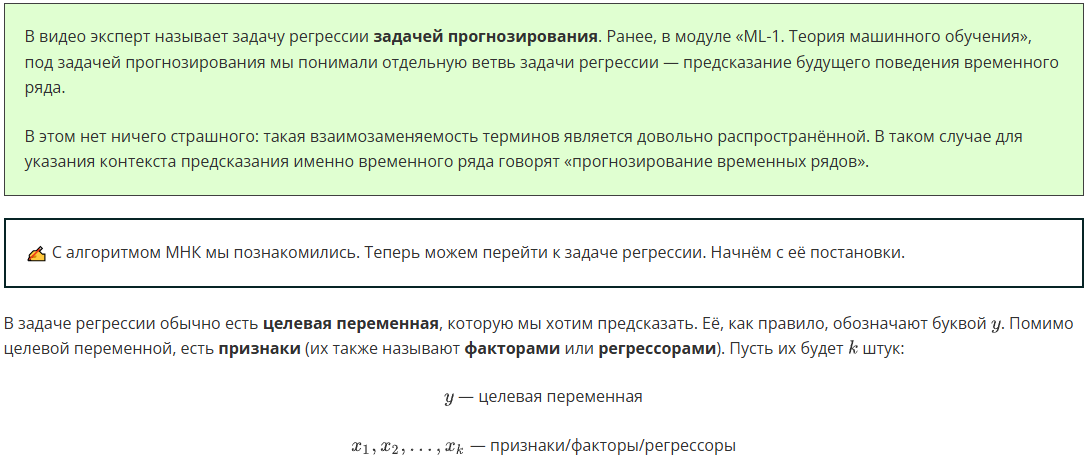
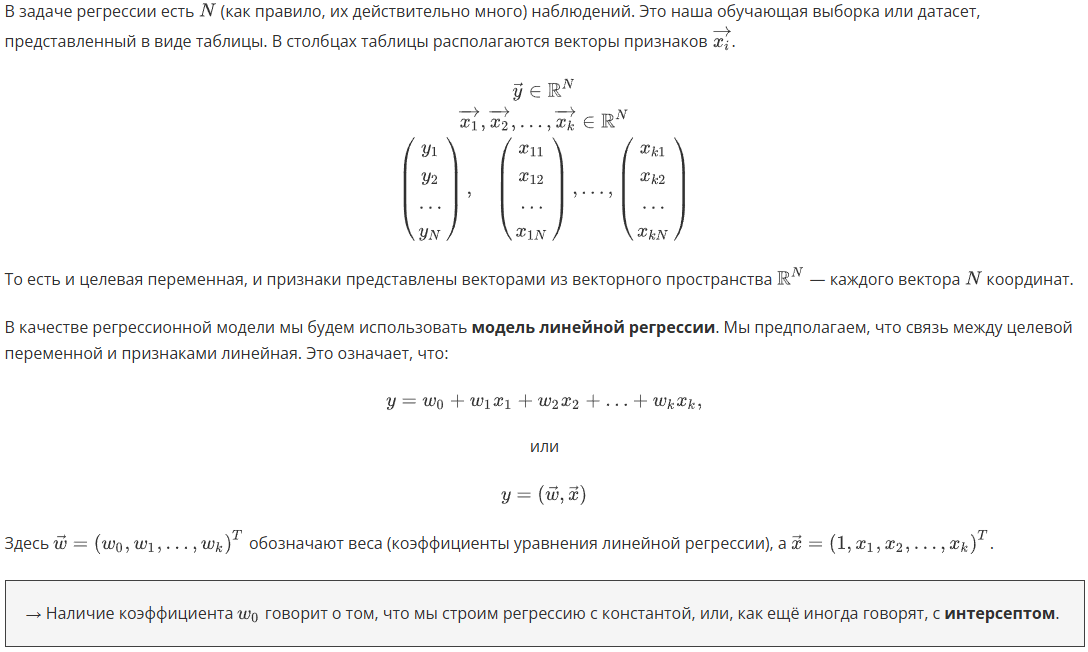
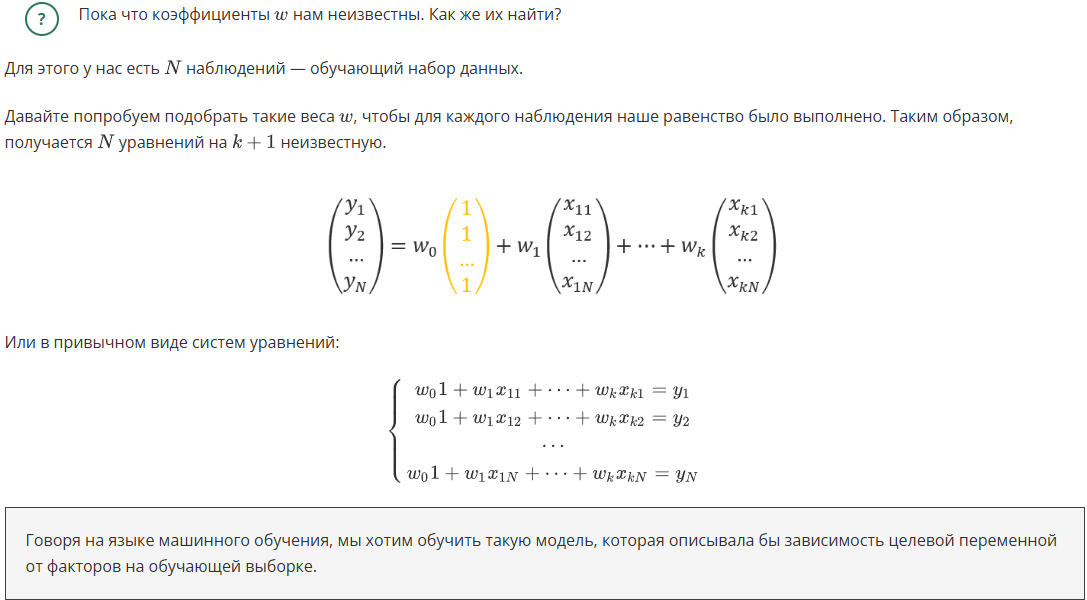
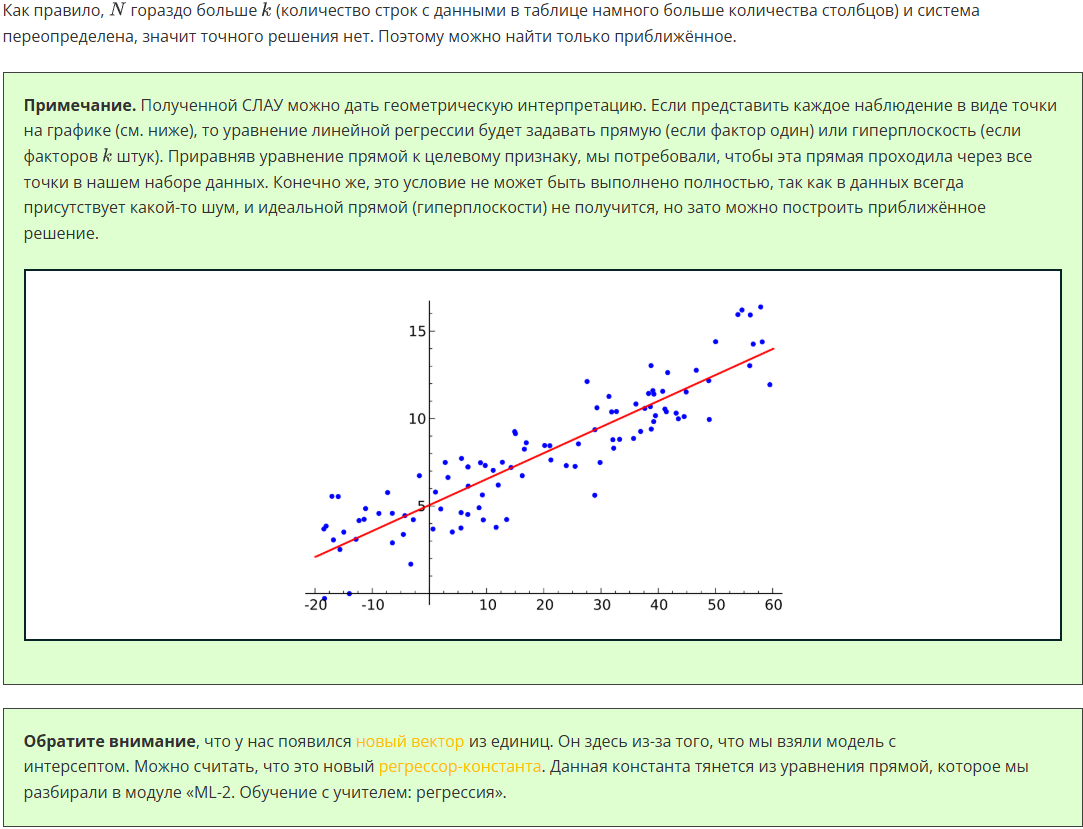
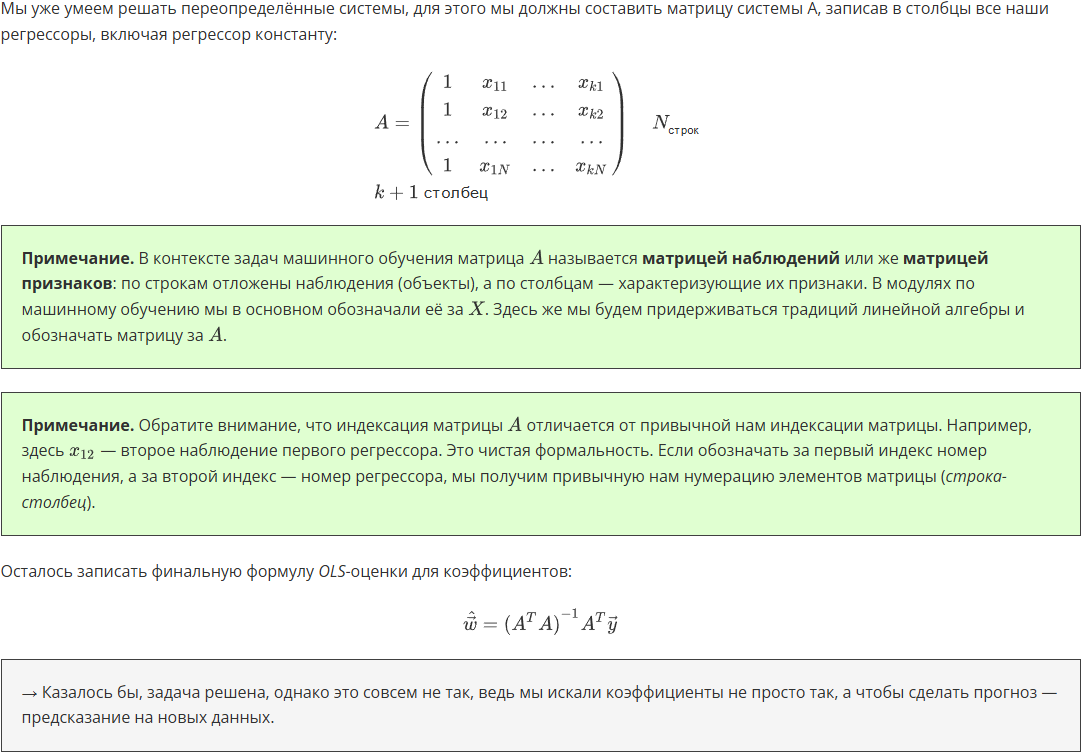
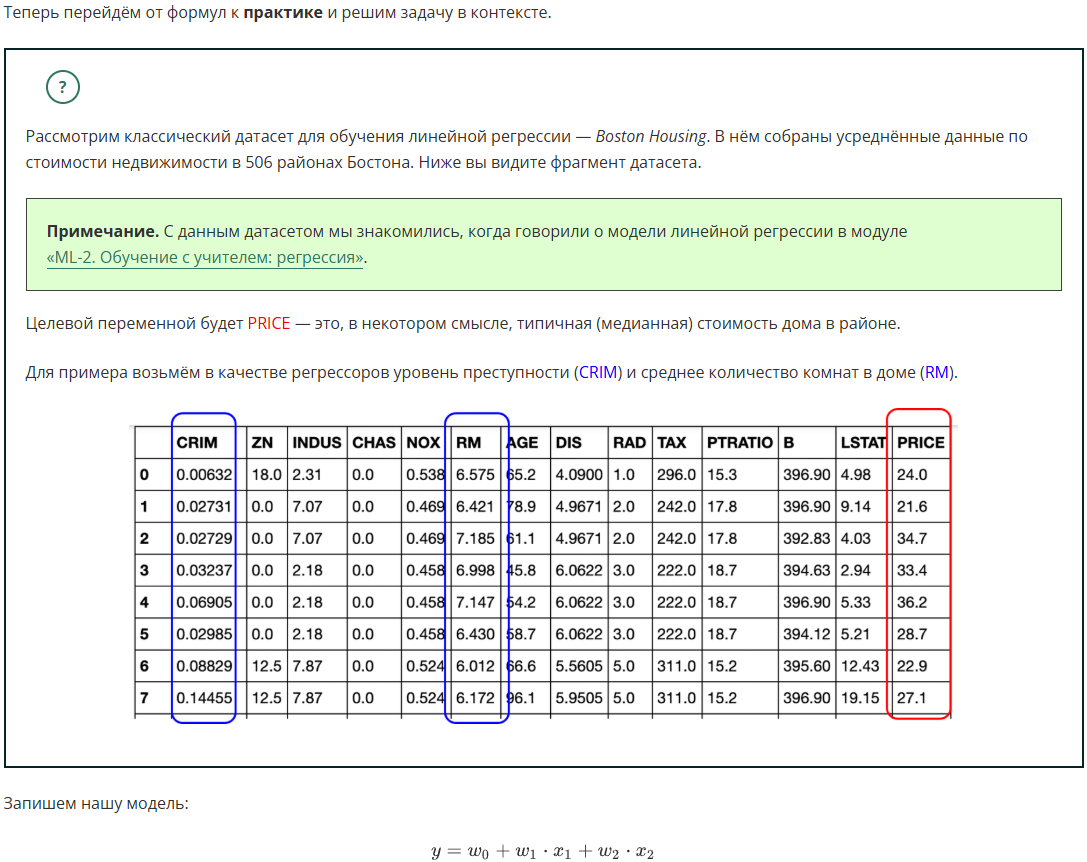
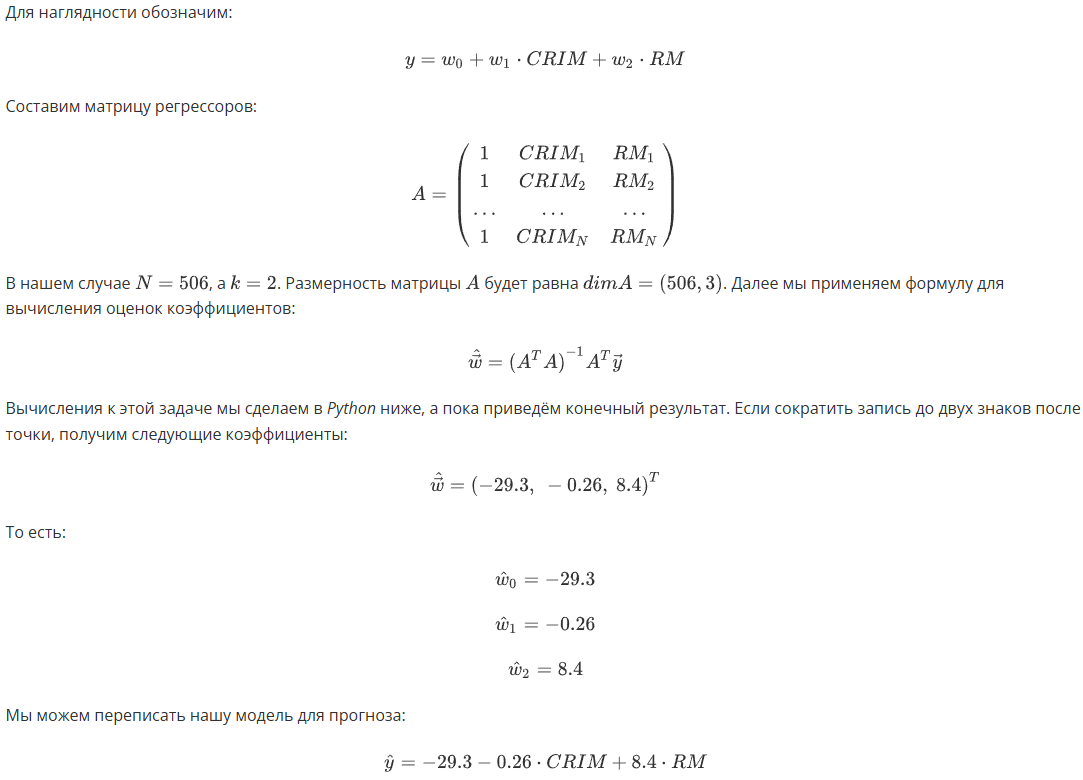
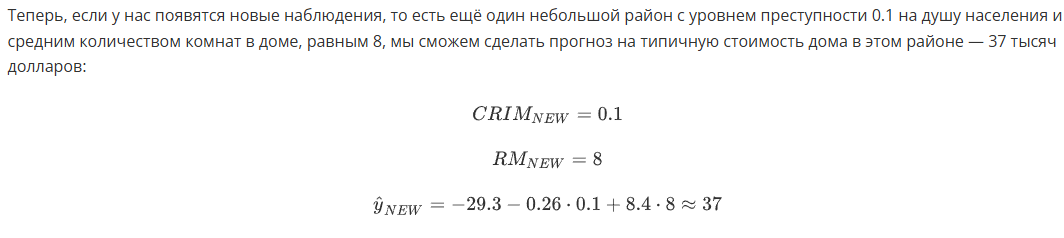

## Решение на Python


In [24]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Формируем матрицу A из столбца единиц и факторов **CRIM** и **RM**, а также вектор целевой переменной :

In [25]:
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


Посмотрим на размерность матрицы A:

In [26]:
# проверим размерность
print(A.shape)
## (506, 3)

(506, 3)


Теперь нам ничего не мешает вычислить оценку вектора коэффициентов  по выведенной нами формуле МНК:

In [27]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


Теперь составим прогноз нашей модели:

In [28]:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[37.85733519]


> Согласитесь, такая запись вычисления оценки стоимости слишком длинная и неудобная, особенно если факторов не два, как у нас, а 200. Более короткий способ сделать прогноз — вычислить скалярное произведение вектора признаков и коэффициентов регрессии.

*Для удобства дальнейшего использования оформим характеристики нового наблюдения в виде матрицы размером :*

In [29]:
# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
## prediction: [[37.85733519]]

prediction: [[37.85733519]]


In [ ]:
print(np.array(w_hat))
print('----------')
print(np.array(new))

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]
----------
[[1.  0.1 8. ]]


,PRICE
0,37.857335


> **Примечание.** Обратите внимание, что, решая задачу с помощью Python, мы получили немного другой результат прогноза стоимости. Это связано с тем, что при выполнении ручного расчёта мы округлили значения коэффициентов и получили менее точный результат.

Мы уже знаем, что алгоритм построения модели линейной регрессии по МНК реализован в классе LinearRegression, находящемся в модуле sklearn.linear_model. Для вычисления коэффициентов (обучения модели) нам достаточно передать в метод fit() нашу матрицу с наблюдениями и вектор целевой переменной, а для построения прогноза — вызвать метод predict():

In [30]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)
## w_hat: [[-29.24471945  -0.26491325   8.39106825]]
## prediction: [[37.85733519]]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


> Примечание. Здесь при создании объекта класса *LinearRegression* мы указали *fit_intercept=False*, так как в нашей матрице наблюдений A уже присутствует столбец с единицами для умножения на свободный член w0. Его повторное добавление не имеет смысла.

### Задание 3.5

Сделайте прогноз типичной стоимости (в тыс. долларов) дома в городе с уровнем преступности **CRIM = 0.2** и средним количеством комнат в доме **RM = 6**. В качестве модели используйте линейную регрессию, оценка вектора коэффициентов которой равна:

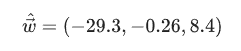

In [68]:
w = np.array([-29.3, -0.26, 8.4])
CRIM = 0.2
RM = 6
A = np.column_stack([1,CRIM, RM])
print('predict:', round((A@w)[0]))

predict: 21


## ПРОБЛЕМЫ В КЛАССИЧЕСКОЙ МНК-МОДЕЛИ

A = np.array

In [75]:
A = np.array([[2,1,1,2],[-2,-1,-1,-2]])
print(np.linalg.det(A@A.T))

B = np.array([[2,1,1,2],[5,3,1,6]])
print(np.linalg.det(B@B.T))

0.0
34.000000000000064


### ОСОБЕННОСТИ КЛАССА LINEAR REGRESSION БИБЛИОТЕКИ SKLEARN

Давайте посмотрим, что «скажет» Python, если мы попробуем построить модель линейной регрессии на вырожденной матрице наблюдений, используя классическую формулу линейной регрессии.

In [76]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix

LinAlgError: Singular matrix

Как и ожидалось, мы получили ошибку, говорящую о том, что матрица At@A — сингулярная (вырожденная), а значит обратить её не получится. Что и требовалось доказать — с математикой всё сходится.

Попробуем обучить модель линейной регрессии *LinearRegression* из модуля sklearn, используя нашу вырожденную матрицу :

In [77]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [ 6.   -1.25  1.25]


Никакой ошибки не возникло! Более того, у нас даже получились вполне адекватные оценки коэффициентов линейной регрессии w_.

На самом деле, не совсем. Здесь нет никакой магии, ошибки округления или бага. Просто в реализации линейной регрессии в sklearn предусмотрена **борьба с плохо определёнными (близкими к вырожденным и вырожденными) матрицами.**

> Для этого используется метод под названием сингулярное разложение (SVD). О нём мы будем говорить отдельно, однако уже сейчас отметим тот факт, что данный метод позволяет всегда получать корректные значения при обращении матриц.

> Если вы хотите понять, почему так происходит, ознакомьтесь с этой [статьёй](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5).

> **Суть метода** заключается в том, что в OLS-формуле мы на самом деле используем не саму матрицу A, а её диагональное представление из сингулярного разложения, которое гарантированно является невырожденным. Вот и весь секрет.

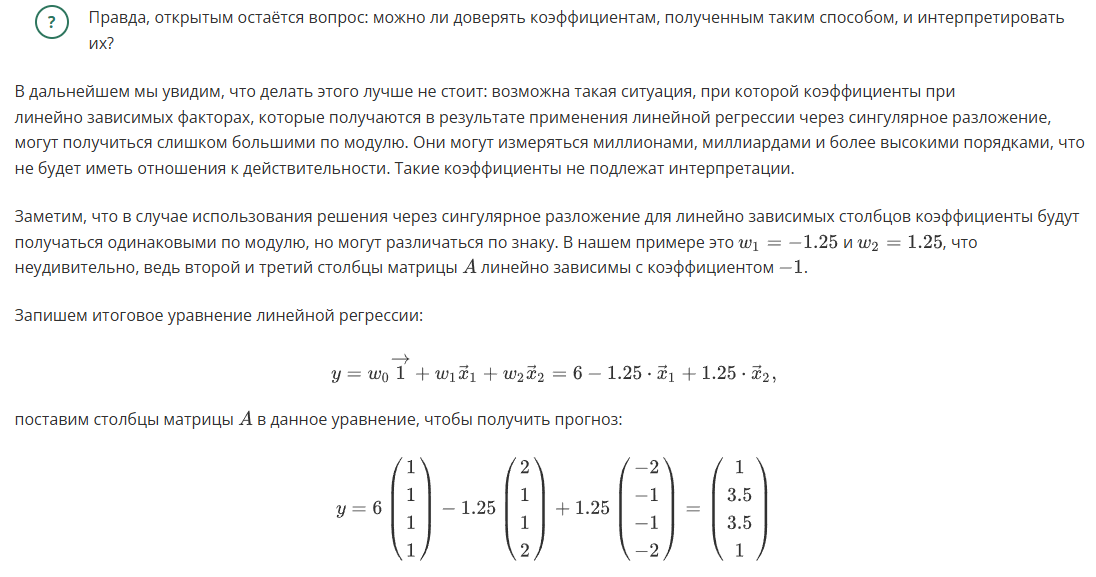
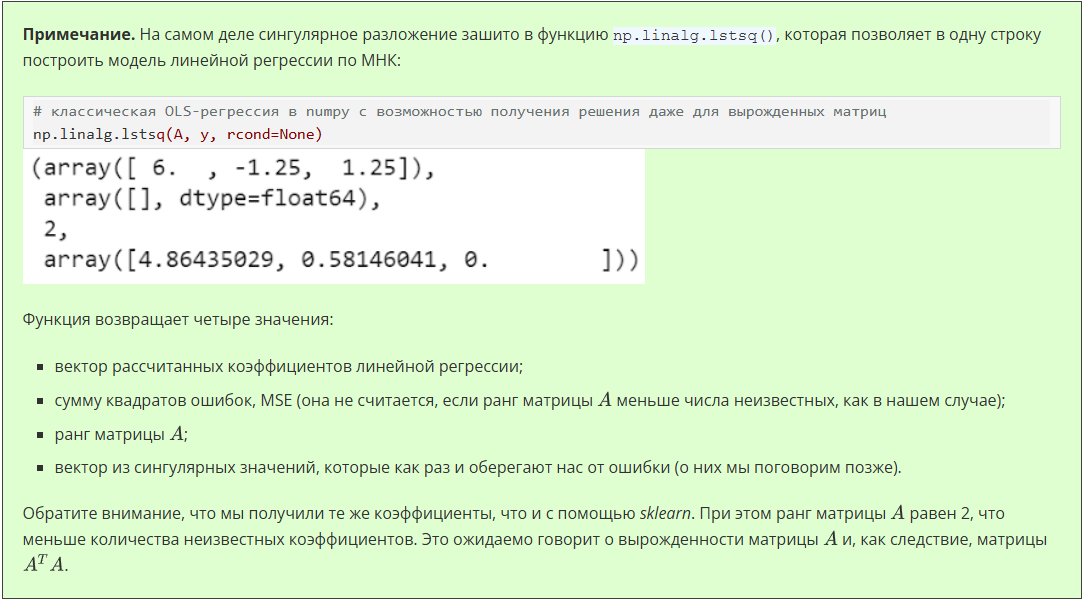
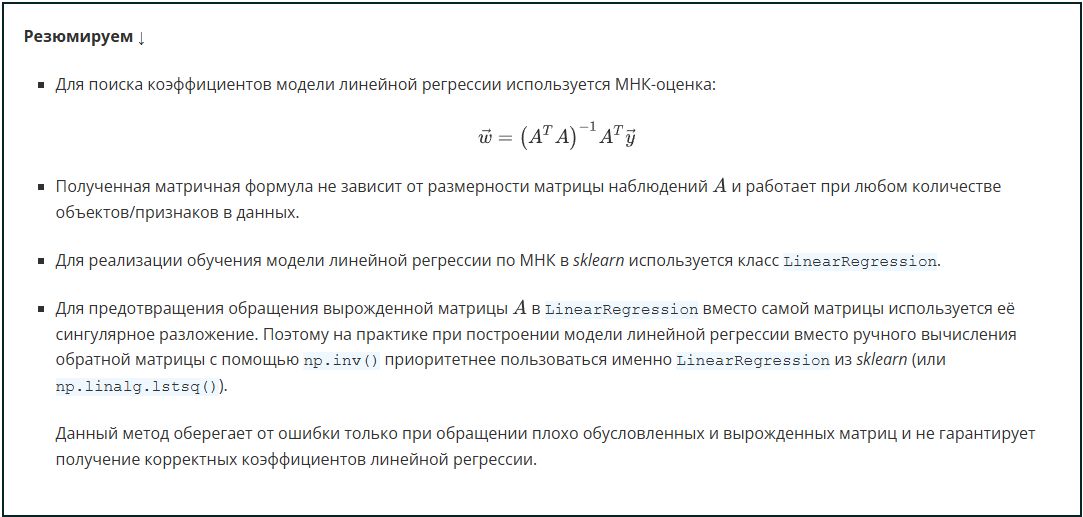

### Задание 3.7

Можно ли найти классическую OLS-оценку (не используя сингулярное разложение) в модели целевой переменной y и регрессорами x1, x2, x3?

In [78]:
A = np.array([[1,1,0,2], [-1,1,0,0], [0,2,0,2]])
np.linalg.det(A@A.T)

np.float64(0.0)

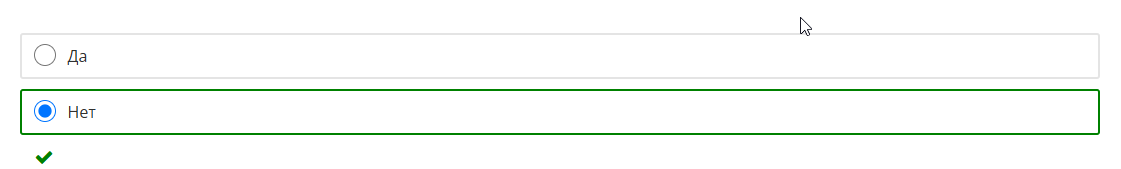